This Kernel is made for the Kaggle competition TMB Box Office Prediction. THe goal is to predict Box office revenues based on a a number of features concerning Box Office movies(Cast, Budget, Genre, etc). I will be utilizing some feature engineering and sklearn models to help predict the training sets revenues.

The data and competition can be found below:
https://www.kaggle.com/c/tmdb-box-office-prediction/overview


# Data Loading

In [1]:
# initial import statements for data loading and exploratory plotting

import pandas as pd
import numpy as np
from matplotlib import pyplot
import ast

from IPython.display import display 
%matplotlib inline

In [2]:
train_raw=pd.read_csv('train.csv')
train_raw2=train_raw.fillna('')



In [3]:
train_raw2.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,,Marine Boy,,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


# Lets Do some Data Cleaning/Munging

## starting with "belongs to collection"

In [4]:
train_raw2['collection']=train_raw2['belongs_to_collection'].apply(lambda x: ast.literal_eval(x)[0]['name'] if x!='' else '')
# Clean up old variable
train_raw2=train_raw2.drop('belongs_to_collection',axis=1)


train_raw2.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,collection
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,93,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,113,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,105,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,122,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,118,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,,Marine Boy,,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,


In [5]:
train_raw2['genres']=train_raw2['genres'].apply(lambda x:','.join([i['name'] for i in ast.literal_eval(x)] if x else ''))
feats_dum=['genres']
feats=[]

In [6]:

train_raw2['keywords']=train_raw2['Keywords'].apply(lambda x : ','.join([i['name'] for i in ast.literal_eval(x)] if x else ''))
feats_dum.append('keywords')
train_raw2['keywords'].head()

0      time travel,sequel,hot tub,duringcreditsstinger
1             coronation,duty,marriage,falling in love
2    jazz,obsession,conservatory,music teacher,new ...
3    mystery,bollywood,police corruption,crime,indi...
4                                                     
Name: keywords, dtype: object

In [7]:
train_raw2['sp_languages']=train_raw2['spoken_languages'].apply(lambda x : ','.join([i['name'] for i in ast.literal_eval(x)] if x else ''))
feats_dum.append('sp_languages')

In [8]:
train_raw2['prod_companies']=train_raw2['production_companies'].apply(lambda x : ','.join([i["name"] for i in ast.literal_eval(x)] if x else ''))
feats_dum.append('prod_companies')

In [9]:
train_raw2['prod_countries']=train_raw2['production_countries'].apply(lambda x : ','.join([i['name'] for i in ast.literal_eval(x)]) if x else '')
feats_dum.append('prod_countries')

In [10]:
train_raw2['release_month']=train_raw2['release_date'].apply(lambda x : int(x.split('/')[0]))
train_raw2['release_day']=train_raw2['release_date'].apply(lambda x : int(x.split('/')[1]))
train_raw2['release_year']=train_raw2['release_date'].apply(lambda x : int(x.split('/')[2]))
feats.append('release_month')
feats.append('release_day')
feats.append('release_year')

train_raw2[feats].head()

,release_month,release_day,release_year
0,2,20,15
1,8,6,4
2,10,10,14
3,3,9,12
4,2,5,9


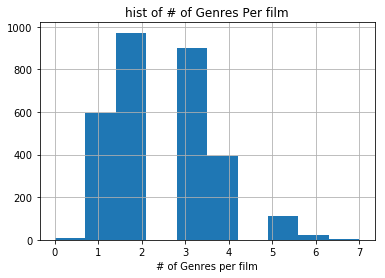

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
train_raw2['genres'].apply(lambda x: len(x.split(',')) if x!='' else 0).hist()
plt.title('hist of # of Genres Per film')
plt.xlabel('# of Genres per film')

In [12]:
train_raw2['runtime']=pd.to_numeric(train_raw2['runtime'])

In [13]:
# train_raw2['production_co']=train_raw2['production_companies'].apply(lambda x:[i['name'] for i in ast.literal_eval(x)] if x else '')
# train_raw2=train_raw2.drop('production_companies', axis=1)
train_raw2.iloc[:3,4:]
feats.append('runtime')
feats.append('popularity')
feats_dum.append('status')
feats_dum.append('original_language')

# train_raw2.iloc[:3,4:]
# train_raw2['genres']=train_raw2['genres'].apply(lambda x:[i['name'] for i in ast.literal_eval(x)] if x else '')

In [14]:
train_raw2['cast_true']=train_raw2['cast'].apply(lambda x:','.join([i['name'] for i in ast.literal_eval(x)][:10] if x else ''))

In [15]:
feats_dum.append('cast_true')

In [16]:
# train_raw3['cast'][0]
# train_raw3['cast']=train_raw3['cast'].apply(lambda x:','.join([i['name'] for i in ast.literal_eval(x)] if x else ''))
# temp2=train_raw2['cast'].str.get_dummies(sep=',')
train_raw2['cast_num']=train_raw2['cast'].apply(lambda x: len(x))
train_raw2['crew_num']=train_raw2['crew'].apply(lambda x:len(x))
feats.append('cast_num')
feats.append('crew_num')

# temp4=train_raw2['cast_true'].str.get_dummies(sep=',')

In [17]:
def get_dummies(ds,feat_dums):
    
#     curr=train_raw2[feats]
    for i in feat_dums:
        if len(ds[i].str.split(','))>1:
            temp=ds[i].str.get_dummies( sep=',')
            
        else:
            temp=ds[i].get_dummies()
        temp2=temp.add_prefix(i)
        try:
            curr=pd.concat([curr,temp2], axis=1)
        except:
            curr=temp2
    return curr
train_dums=get_dummies(train_raw2,
                        feats_dum)
# train_dummies = pd.get_dummies(train_raw2, columns = ['genres', 'original_language'] )
# train_dummies.describe()


In [18]:
train_raw2[feats]

,release_month,release_day,release_year,runtime,popularity,cast_num,crew_num
0,2,20,15,93.0,6.575393,4722,12510
1,8,6,4,113.0,8.248895,4078,1676
2,10,10,14,105.0,64.299990,9888,11095
3,3,9,12,122.0,3.174936,1334,477
4,2,5,9,118.0,1.148070,812,322
5,8,6,87,83.0,0.743274,812,1876
6,8,30,12,92.0,7.286477,2783,13304
7,1,15,4,84.0,1.949044,797,164
8,2,16,96,100.0,6.902423,2409,1487
9,4,16,3,91.0,4.672036,4050,1908


In [19]:
# train_raw2[train_raw2[feats[3]].isnull()==True][feats[3]]
train_raw2['run_adj']=train_raw2[feats[3]].fillna(0)
feats.remove('runtime')
feats.append('run_adj')
train_raw2[train_raw2['run_adj'].isnull()==True][feats[-6]]
train['spoken_languages']

Series([], Name: release_day, dtype: int64)

# Conducting Normalization and preprocessing for modeling

In [20]:
feats

['release_month',
 'release_day',
 'release_year',
 'popularity',
 'cast_num',
 'crew_num',
 'run_adj']

In [21]:

# df_with_dummies = pd.get_dummies(train_raw2, columns =  )

# train_raw3=train_raw2[['budget','popularity','cast_num', 'crew_num', 'genres','original_language']]
# train_raw4=pd.get_dummies(train_raw3, columns=['genres','original_language'])

# train_final=train_raw2[feats].fillna()
from sklearn import preprocessing
min_max_scaler_feat = preprocessing.MinMaxScaler()
min_max_scaler_lab = preprocessing.MinMaxScaler()
train_base=['budget','popularity','cast_num', 'crew_num']

train_base_scaled = pd.DataFrame(min_max_scaler_feat.fit_transform(train_raw2[feats]))

train_final=pd.concat([train_base_scaled,train_dums], axis=1)
revenue_final=train_raw2['revenue'].values.astype(float)
revenue_final=min_max_scaler_lab.fit_transform(revenue_final.reshape(-1, 1))
from sklearn.cross_validation import train_test_split


# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_final, 
                                                    revenue_final, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

C:\Users\aguil\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

In [23]:
# l0 = tf.keras.layers.Dense(units=25, input_shape=[15371])  
# l0 = tf.keras.layers.Dense(units=25, input_shape=[60]) 
l0 = tf.keras.layers.Dense(units=25, input_shape=[26606]) 
hidden1 = tf.keras.layers.Dense(units=25)  
hidden2 = tf.keras.layers.Dense(units=10)  
outlayer=tf.keras.layers.Dense(units=1)  

model = tf.keras.Sequential([l0,hidden1,hidden2,outlayer])
# model.compile(loss='mean_squared_error',
#               optimizer=tf.keras.optimizers.Adam(0.1))
# model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(lr=0.01, nesterov=True))
model.compile(loss='mean_squared_logarithmic_error', optimizer=tf.keras.optimizers.SGD(lr=0.01, nesterov=True))

# MeanSquaredLogarithmicError


history = model.fit(X_train, y_train, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


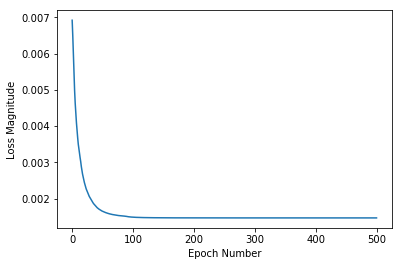

In [24]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")


plt.plot(history.history['loss'])

In [25]:
f2=model.predict(X_test)


In [26]:
f3=pd.DataFrame(f2)
f3.describe()

,0
count,600.000000
mean,-0.046692
std,0.126120
min,-0.369087
25%,-0.132477
50%,-0.057635
75%,0.019787
max,0.842486


In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, f2) 

-1.4311156062938553

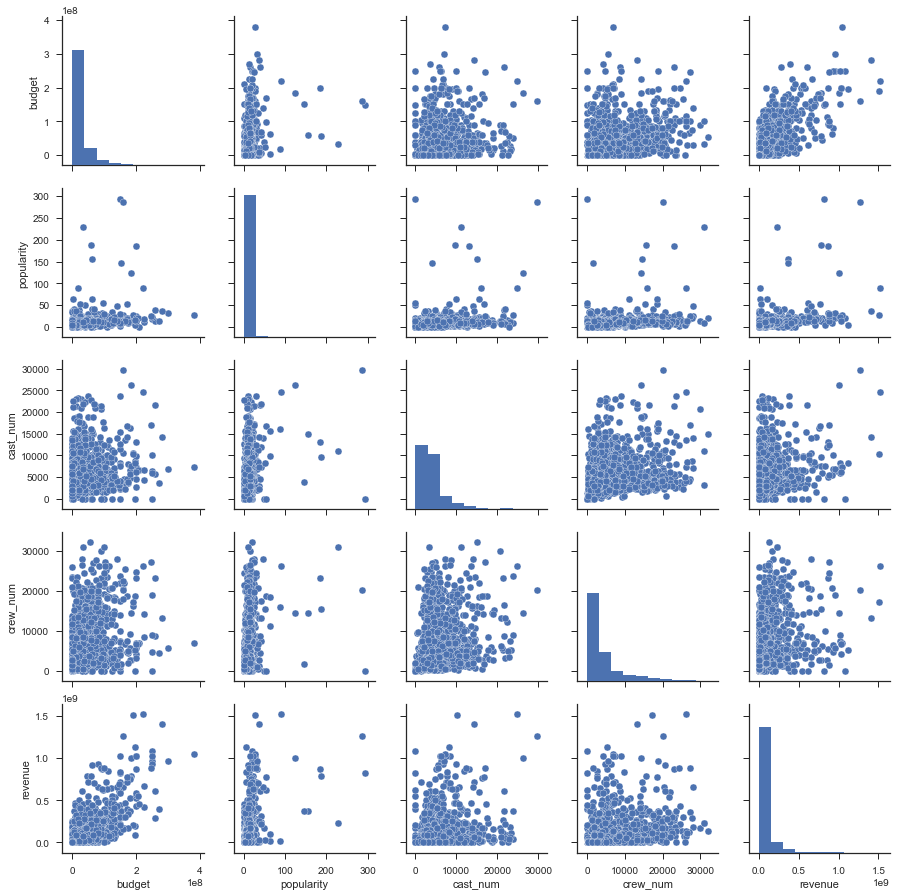

In [28]:

import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

# produces a plots of all features against eachother
sns.pairplot(train_raw2[['budget','popularity','cast_num', 'crew_num','revenue']])

In [29]:
for i,v in zip(y_test,f2):
    print(str(i)+"True vs "+str(v)+"predicted")

[8.06089714e-06]True vs [-0.17401582]predicted
[2.75474859e-06]True vs [-0.02970474]predicted
[0.01023741]True vs [-0.02365722]predicted
[0.00455189]True vs [-0.0609841]predicted
[0.00164521]True vs [-0.04647531]predicted
[0.01130963]True vs [-0.11630119]predicted
[0.00525543]True vs [-0.02248252]predicted
[0.00294129]True vs [-0.23074925]predicted
[0.0046066]True vs [-0.05126818]predicted
[0.00571206]True vs [-0.13464661]predicted
[0.00335739]True vs [-0.23029162]predicted
[0.01262473]True vs [-0.1204551]predicted
[0.00629354]True vs [-0.13009714]predicted
[0.09839802]True vs [0.00128279]predicted
[0.00177547]True vs [0.05731966]predicted
[0.17381253]True vs [0.00439273]predicted
[0.02908522]True vs [-0.089853]predicted
[0.01250364]True vs [-0.3690875]predicted
[0.09731814]True vs [0.08854161]predicted
[2.9412502e-05]True vs [-0.09282191]predicted
[0.03666027]True vs [-0.05508214]predicted
[0.04046523]True vs [-0.09988676]predicted
[0.03033072]True vs [0.09610528]predicted
[0.00121171

In [65]:
# Preprocess the test data

test_raw=pd.read_csv('test.csv')
test_raw=test_raw.fillna('')
# train_raw2=train_raw.fillna('')

test_raw['genres']=test_raw['genres'].apply(lambda x:','.join([i['name'] for i in ast.literal_eval(x)] if x else ''))
test_raw['collection']=test_raw['belongs_to_collection'].apply(lambda x: ast.literal_eval(x)[0]['name'] if x!='' else '')
train_raw2['keywords']=train_raw2['Keywords'].apply(lambda x : ','.join([i['name'] for i in ast.literal_eval(x)] if x else ''))
test_temp1=test_raw['genres'].str.get_dummies(sep=',')
test_temp2=test_raw['original_language'].str.get_dummies()
test_raw['cast_num']=test_raw['cast'].apply(lambda x: len(x))
test_raw['crew_num']=test_raw['crew'].apply(lambda x:len(x))
test_raw['cast_true']=test_raw['cast'].apply(lambda x:','.join([i['name'] for i in ast.literal_eval(x)][:10] if x else ''))
test_raw['release_month']=test_raw['release_date'].apply(lambda x: int(x.split('/')[0]) if x.split('/')[0]!='' else 1)
test_raw['release_day']=test_raw['release_date'].apply(lambda x : int(x.split('/')[1]) if len(x)>5 else 1)
test_raw['release_year']=test_raw['release_date'].apply(lambda x : int(x.split('/')[2]) if len(x)>5 else 50)
test_raw['run_adj']=test_raw[feats[3]].fillna(0)

# train_base=['budget','popularity','cast_num', 'crew_num']
test_final_feat=pd.DataFrame(min_max_scaler_feat.transform(test_raw[feats]))
test_preprocess=pd.concat([test_final_feat,test_temp1, test_temp2], axis=1)



def add_miss_cols(ds, columns):
    miss_cols=set(columns)- set(ds.columns)
    drop_cols=set(ds.columns)-set(columns)
    for i in miss_cols:
        ds[i]=0
    ds2=ds.drop(drop_cols, axis=1)
    return ds2,miss_cols
test_df,miss_cols=add_miss_cols(test_preprocess, train_final.columns)
# test_preprocess.columns
miss_cols
test_pred=model.predict(test_df)
test_pred1=min_max_scaler_lab.inverse_transform(test_pred)




In [66]:
# test_pred2=[]
# for i,v in enumerate(test_pred.tolist()):
#     if v[0]<0:
#         test_pred2.append([i,0])
#     else:
#         test_pred2.append([i,v[0]])
df=pd.DataFrame(test_pred1, columns=['revenue'])        
df['revenue']=df['revenue'].apply(lambda x: x if x >0 else 0)
df['id']=test_raw['id']
df_final=df[['id','revenue']]
df_final.to_csv('predictions.csv',index=False)

In [71]:
test_preprocess.columns

Index([                       0,                        1,
                              2,                        3,
                              4,                        5,
                              6,                 'Action',
                    'Adventure',              'Animation',
       ...
       'cast_trueDan Futterman', 'cast_trueWallace Shawn',
       'keywordsbritish sailor', 'cast_trueSanjay Mishra',
                  'keywordsnun', 'cast_trueCherie Lunghi',
         'cast_trueKate Bayley',       'keywordsnovelist',
       'keywordsvengeful ghost',  'cast_trueWarren Saire'],
      dtype='object', length=26664)

In [67]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2400 samples.
Testing set has 600 samples.


In [68]:
len(X_train.columns)

26606

In [69]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score
from time import time 

from sklearn.ensemble import AdaBoostClassifier as AdaBC
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
#     results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
#     results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results, predictions_train, predictions_test

C:\Users\aguil\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [70]:
res, pred_train, pred_test=train_predict(AdaBC(random_state=15), len(y_train), X_train, y_train, X_test, y_test)

C:\Users\aguil\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBoostClassifier
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
l0 = tf.keras.layers.Dense(units=3, input_shape=[38646])  

In [ ]:
model = tf.keras.Sequential([l0])

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [ ]:
history = model.fit(X_train, y_train, epochs=100, verbose=False)
print("Finished training the model")

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_test.shape

In [ ]:
l=[1,2,3]


In [ ]:
y_pred.shape
f=lambda x: sum(x)/3
f(y_pred)

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
f2=np.asarray([sum(i)/3 for i in y_pred])
print(f2[0:10])
print(y_train[0:10])

In [ ]:
y_test

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, f2) 

In [ ]:

import xgboost as xgb
def xgb_model(trn_x, trn_y, val_x, val_y, test) :
    
    params = {'objective': 'reg:linear', 
              'eta': 0.01, 
              'max_depth': 6, 
              'subsample': 0.7, 
              'colsample_bytree': 0.8,  
              'eval_metric': 'rmse', 
              'seed': 10, 
              'silent': True,
    }
    
    record = dict()
    model = xgb.train(params
                      , xgb.DMatrix(trn_x, trn_y)
                      , 10000
                      , [(xgb.DMatrix(trn_x, trn_y), 'train'), (xgb.DMatrix(val_x, val_y), 'valid')]
#                       , verbose_eval=verbose
                      , early_stopping_rounds=200
                      , callbacks = [xgb.callback.record_evaluation(record)])
    best_idx = np.argmin(np.array(record['valid']['rmse']))

    val_pred = model.predict(xgb.DMatrix(val_x), ntree_limit=model.best_ntree_limit)
    test_pred = model.predict(xgb.DMatrix(test), ntree_limit=model.best_ntree_limit)

    return {'val':val_pred, 'test':test_pred, 'error':record['valid']['rmse'][best_idx], 'importance':[i for k, i in model.get_score().items()]}

In [ ]:
xgb_model(X_train, y_train, X_test, y_test, y_test) 

In [73]:
# X_train, X_test, y_train, y_test
import lightgbm
from lightgbm import LGBMRegressor

In [83]:
y_train_tru=[i for ii in y_train for i in ii]
y_test_tru=[i for ii in y_test for i in ii]
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
model1 = LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
model1.fit(X_train, y_train_tru, 
        eval_set=[(X_train, y_train_tru), (X_test, y_test_tru)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 0.0408797	valid_1's rmse: 0.0545119
[2000]	training's rmse: 0.0327239	valid_1's rmse: 0.0538172
Early stopping, best iteration is:
[2109]	training's rmse: 0.0320768	valid_1's rmse: 0.0537708


LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, bagging_seed=11,
       boosting='gbdt', boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, feature_fraction=0.9, importance_type='split',
       lambda_l1=0.2, learning_rate=0.01, max_depth=5, metric='rmse',
       min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
       min_split_gain=0.0, n_estimators=20000, n_jobs=-1, nthread=4,
       num_leaves=30, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0, verbosity=-1)

In [85]:
test_pred2=model1.predict(test_df)

In [86]:
df=pd.DataFrame(test_pred2, columns=['revenue'])        
df['revenue']=df['revenue'].apply(lambda x: x if x >0 else 0)
df['id']=test_raw['id']
df_final=df[['id','revenue']]
df_final.to_csv('predictions.csv',index=False)

In [87]:
import eli5
eli5.show_weights(model1, feature_filter=lambda x: x != '<BIAS>')

Weight,Feature
0.4549,3
0.0897,6
0.0805,4
0.0662,genresAdventure
0.0602,5
0.0568,2
0.0237,0
0.0200,keywords3d
0.0175,genresFamily
0.0154,1


In [89]:
for i,v in zip(y_test,test_pred2):
    print(str(i)+"True vs "+str(v)+"predicted")

[8.06089714e-06]True vs 0.0predicted
[2.75474859e-06]True vs 0.0predicted
[0.01023741]True vs 0.009120017467129666predicted
[0.00455189]True vs 3.955406404922037e-05predicted
[0.00164521]True vs 0.0predicted
[0.01130963]True vs 0.0predicted
[0.00525543]True vs 0.0predicted
[0.00294129]True vs 0.009409725977387526predicted
[0.0046066]True vs 0.00778509391823803predicted
[0.00571206]True vs 0.03262315544130297predicted
[0.00335739]True vs 0.0predicted
[0.01262473]True vs 0.0predicted
[0.00629354]True vs 0.0predicted
[0.09839802]True vs 0.0predicted
[0.00177547]True vs 0.0predicted
[0.17381253]True vs 0.0predicted
[0.02908522]True vs 0.006103062622961833predicted
[0.01250364]True vs 0.01448473133564242predicted
[0.09731814]True vs 0.0predicted
[2.9412502e-05]True vs 0.08420146603702934predicted
[0.03666027]True vs 0.0predicted
[0.04046523]True vs 0.031584916532303026predicted
[0.03033072]True vs 0.0predicted
[0.00121171]True vs 0.00018801908206167578predicted
[0.02691809]True vs 0.0predic